##### PLOTTER OF THE RESULTS OF A GRID SEARCH

In [1]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy.stats import t


In [3]:
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_10_12_23"
output_dir = "/home/zhanna/bachelorarbeit/zbb/experiments/output_grid_search_final"

In [4]:
model_names = [
    # "RandomForestW2V",
    # "RandomForest",
    "LogisticRegression",
    # "LogisticRegressionW2V",
    # "NaiveSA",
    # "AFinn",
    # "Vader"
]

model_name = model_names[0]
file_name = os.path.join(output_dir, 'grid_search_{}.pkl'.format(model_name))

In [5]:
with open(file_name, 'rb') as f:
    results = pickle.load(f)

/home/zhanna/bachelorarbeit/zbb/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/zhanna/bachelorarbeit/zbb/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/zhanna/bachelorarbeit/zbb/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegress

In [6]:
# results
results_df = pd.DataFrame(results['cv_results'])

In [7]:
import json
with open('/home/zhanna/bachelorarbeit/zbb/experiments/parameters/grid_search.json') as f:
    p = json.load(f)

In [8]:
p['models']['NaiveSA']['grid_search']

{'data_selector__verbose': [1],
 'data_selector__dimension': ['reviews',
  'reviews_no_punctuation',
  'reviews_no_stopwords',
  'stamm',
  'stamm_no_punctuation',
  'stamm_no_stop_punct'],
 'naive_sa__weigth_added_words': [0.0, 0.5, 1.0, 2.0, 3.0],
 'naive_sa__use_frequency': [True, False],
 'naive_sa__tokenizer_name': ['split'],
 'naive_sa__verbose': [1]}

In [9]:
results

{'best_estimator': '/data/zibaldone/projects/ai/zbb//experiments/output_grid_search_all/grid_search_model',
 'best_score': 0.9187999999999998,
 'best_params': {'clf__C': 100.0,
  'clf__penalty': 'l2',
  'data_selector__dimension': 'reviews_no_punctuation',
  'data_selector__verbose': 1,
  'vect__ngram_range': (1, 2),
  'vect__norm': 'l2',
  'vect__stop_words': None,
  'vect__tokenizer': None,
  'vect__use_idf': True},
 'cv_results': {'mean_fit_time': array([ 37.65042356, 144.33877157,  27.68394584, 130.81294348,
          23.62513623,  94.83678289,  69.27997124, 230.4404285 ,
          48.96503163, 140.90254785,  37.2460684 , 131.37261234]),
  'std_fit_time': array([ 6.37583802, 31.09628675,  4.44333472, 20.28784393,  2.49501033,
          8.1179545 ,  6.48107791, 29.37354509,  3.88819476, 18.81789183,
          3.59585538, 20.02692783]),
  'mean_score_time': array([3.05297025, 8.87745433, 2.06120306, 5.61175784, 1.65950912,
         4.43184366, 3.10317077, 8.73106199, 2.0362449 , 4.44

In [10]:
results['cv_results']

{'mean_fit_time': array([ 37.65042356, 144.33877157,  27.68394584, 130.81294348,
         23.62513623,  94.83678289,  69.27997124, 230.4404285 ,
         48.96503163, 140.90254785,  37.2460684 , 131.37261234]),
 'std_fit_time': array([ 6.37583802, 31.09628675,  4.44333472, 20.28784393,  2.49501033,
         8.1179545 ,  6.48107791, 29.37354509,  3.88819476, 18.81789183,
         3.59585538, 20.02692783]),
 'mean_score_time': array([3.05297025, 8.87745433, 2.06120306, 5.61175784, 1.65950912,
        4.43184366, 3.10317077, 8.73106199, 2.0362449 , 4.44201388,
        1.79400725, 4.4949316 ]),
 'std_score_time': array([0.82222565, 2.54910011, 0.67231565, 1.4547364 , 0.35415019,
        0.73523594, 0.65764382, 1.74156257, 0.51905031, 0.99400552,
        0.42407083, 0.98934754]),
 'param_clf__C': masked_array(data=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 100.0, 100.0, 100.0,
                    100.0, 100.0, 100.0],
              mask=[False, False, False, False, False, False, False, False,
         

In [37]:
def plot_search_results(grid, metric):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_{}'.format(metric)]
    stds_test = results['std_test_{}'.format(metric)]
    # means_train = results['mean_train_{}'.format(metric)]
    # stds_train = results['std_train_{}'.format(metric)]

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        # print(results['param_'+p_k].data, "<->", p_v, " => ", results['param_'+p_k].data==p_v)
        try:
            masks.append(list(results['param_'+p_k].data==p_v))
        except: pass

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        # y_2 = np.array(means_train[best_index])
        # e_2 = np.array(stds_train[best_index])
        # ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].plot(x, y_1, linestyle='--', marker='o', label='test')
        # ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (2,) and (4,)

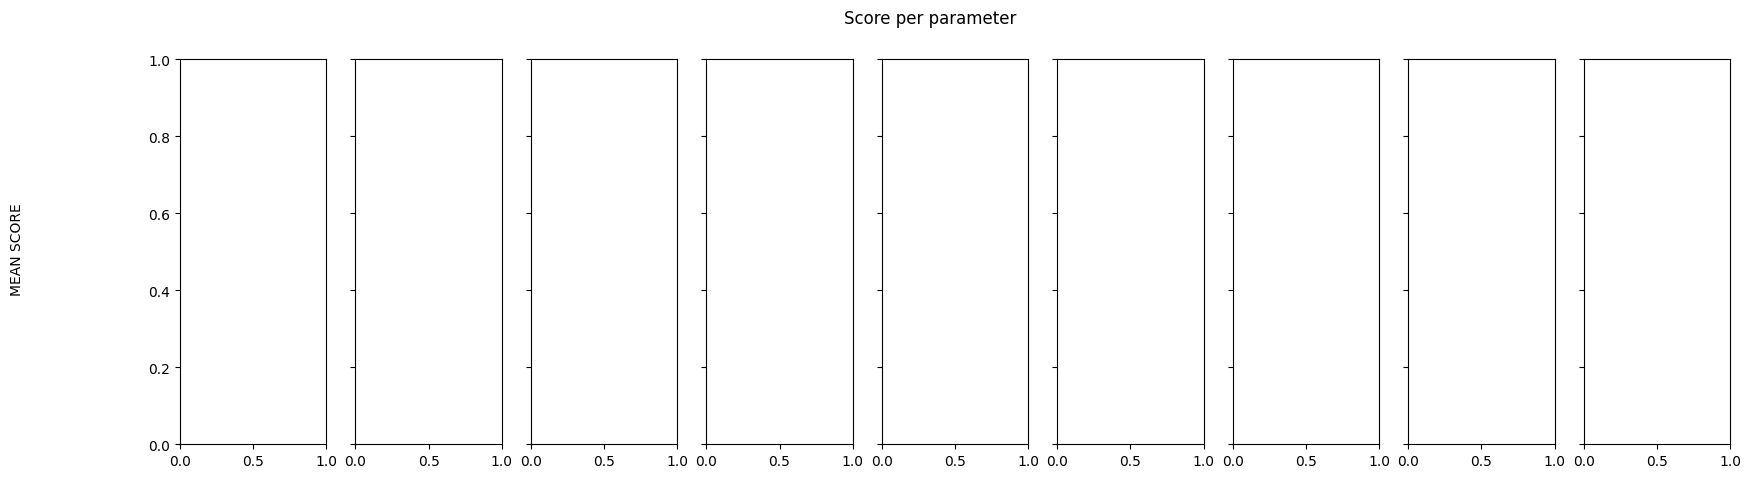

In [38]:
plot_search_results(results['grid_search'], 'f1')

In [24]:
for k in results['grid_search'].cv_results_.keys():
    print(k)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_clf__C
param_clf__penalty
param_data_selector__dimension
param_data_selector__verbose
param_vect__ngram_range
param_vect__norm
param_vect__stop_words
param_vect__tokenizer
param_vect__use_idf
params
split0_test_precision
split1_test_precision
split2_test_precision
split3_test_precision
split4_test_precision
split5_test_precision
split6_test_precision
split7_test_precision
split8_test_precision
split9_test_precision
split10_test_precision
split11_test_precision
split12_test_precision
split13_test_precision
split14_test_precision
split15_test_precision
split16_test_precision
split17_test_precision
split18_test_precision
split19_test_precision
split20_test_precision
split21_test_precision
split22_test_precision
split23_test_precision
split24_test_precision
split25_test_precision
split26_test_precision
split27_test_precision
split28_test_precision
split29_test_precision
split30_test_precision
split31_test_precision
split32_tes